In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Define the acceleration due to gravity
g = 9.81

#Complete the RHS f for double spring pendulum system y' = f.
#Return f as a numpy array of size 8.
def fpend(u,ks,L0,m):
    #x1, y1, x2, y2, x1_d, y1_d, x2_d, y2_d = u
    x1 = u[0]
    y1 = u[1]
    x2 = u[2]
    y2 = u[3]
    x1_d = u[4]
    y1_d = u[5]
    x2_d = u[6]
    y2_d = u[7]
    k1 = ks[0]
    k2 = ks[1]
    L01 = L0[0]
    L02 = L0[1]
    m1 = m[0]
    m2 = m[1]
    #k1, k2 = ks
    #L01, L02 = L0
    #m1, m2 = m


#magnitude of spring force

    L1 = (np.sqrt((x1)**2 + (y1)**2))
    L2 = (np.sqrt((x2-x1)**2 + (y2-y1)**2))

    Fs1 = np.abs(k1*(L1 - L01))
    Fs2 = np.abs(k2*(L2 - L02))

    #print(L1, L2)
#direction vector of spring force

    #tension - in direction of the vector
    if ((L1 > L01)):
      #tension
      dl1 = np.array([0-x1, 0-y1])
    else:
      #compression
      dl1 = np.array([x1, y1])

    F11 = (Fs1 * dl1) / (L1)


    #if tension - in direction of vector
    if ((L2 > L02)):
      #tension
      dl2 = (np.array([x1 - x2, y1 - y2]))
    else:
      #compression
      dl2 = (np.array([x2 - x1, y2 - y1]))

    #F12 = Fs2 * dl2
    F21 = (Fs2 * dl2) / (L2)
    F12 = (Fs2 * dl2 * -1) / (L2)

    Fg1 = m1*g
    Fg2 = m2*g

    f = np.zeros(8, dtype = 'float')
    f[0] = x1_d
    f[1] = y1_d
    f[2] = x2_d
    f[3] = y2_d

    f[4] = ((F11[0] / m1)) + ((F12[0]/ m1))
    f[5] = (F11[1]/m1)  - (Fg1 / m1) + (F12[1] / m1)

    f[6] = F21[0] / m2
    f[7] = (F21[1]/ m2) - (Fg2 / m2)

    return f



In [ ]:
#TEST1
ks = np.array([2,2])
L0 = np.array([3.0, 1.0])
m = np.array([1,1])
u = np.array([1,1,-1,2,0,0,0,0])
print(fpend(u,ks,L0, m))

[  0.           0.           0.           0.           0.03149507
  -6.4617865    2.21114562 -10.91557281]


In [ ]:
#TEST2
ks = np.array([2,2])
L0 = np.array([0.5, 1.0])
m = np.array([2,1])
u = np.array([1,0,1,1,0,0,0,0])
print(fpend(u,ks,L0, m))


[ 0.    0.    0.    0.   -0.5  -9.81  0.   -9.81]


In [ ]:
#TEST3
ks = np.array([1,1])
L0 = np.array([3.0, 1.0])
m = np.array([1,1])
u = np.array([-1,1,1,-1,0,0,0,0])
print(fpend(u,ks,L0, m))


[ 0.          0.          0.          0.          0.17157288 -9.98157288
 -1.29289322 -8.51710678]


In [ ]:
#TEST4
ks = np.array([1,1])
L0 = np.array([1, 1])
m = np.array([1,1])
u = np.array([0,-2,1,-2,0,0,0,0])
print(fpend(u,ks,L0, m))


[ 0.    0.    0.    0.    0.   -8.81  0.   -9.81]


In [ ]:
#TEST5
ks = np.array([8, 5])
L0 = np.array([1.55296006, 1.24796064])
m = np.array([1.6144261 , 1.70237178])
u = np.array([-0.26583136,  0.13684332,  0.49307954, -0.17683269,  0.5634019,  -0.10753303,
  0.50045765, -0.80556943])
print(fpend(u,ks,L0, m))


[  0.5634019   -0.10753303   0.50045765  -0.80556943  -6.74633675
  -6.46108134   3.1817032  -11.12507396]


In [ ]:
#TEST6
ks = np.array([5, 2])
L0 = np.array([1.62001487, 1.9715754 ])
m = np.array([1.25517944, 1.99119103])
u= np.array([-0.04258033 , 0.94327086,  0.34322919 , 1.44095558, -1.04034772,  0.87392638 ,0.20135698, -0.51785466])

print(fpend(u, ks, L0, m))
print(fpend2(u,ks, L0, m))

[-1.04034772  0.87392638  0.20135698 -0.51785466 -1.43136725 -8.81059038
  0.55070546 -9.0996036 ]
[ -1.04034772   0.87392638   0.20135698  -0.51785466  -1.18857641
 -14.18907202  -1.30997183 -11.4998312 ]


In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m  = np.array([1.0, 1.0])
h = 0.02
N = 200
t, u = rk4pend(u0,ks,L0,m,h,N)
print(u)

[[ 1.00000000e+00  9.99999997e-01  9.99999834e-01 ... -1.50521105e+00
  -1.51850681e+00 -1.50961090e+00]
 [ 0.00000000e+00 -1.96200000e-03 -7.84799935e-03 ... -3.91283004e-01
  -3.38776041e-01 -2.95926741e-01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ... -1.70807448e+00
  -1.56359100e+00 -1.41938387e+00]
 ...
 [ 0.00000000e+00 -1.96199998e-01 -3.92399858e-01 ...  2.79866907e+00
   2.41440066e+00  1.84881327e+00]
 [ 0.00000000e+00  0.00000000e+00  3.87812415e-17 ...  7.24382245e+00
   7.20972130e+00  7.21984791e+00]
 [ 0.00000000e+00 -1.96200000e-01 -3.92400000e-01 ... -6.73893871e-01
  -6.48296949e-01 -5.75448932e-01]]


In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m  = np.array([1.0, 1.0])
h = 0.02
N = 200
def ab2pend(u0,ks,L0,m,h,N):
    yab2 = np.zeros((8, N+1))
    yab2[:,0] = u0
    for n in range(N):
        k_1 = fpend(yab2[:,n], ks, L0, m)
        k_2 = fpend(yab2[:,n] + 0.5*h*k_1, ks, L0, m)
        if (n == 0):
            yab2[:,n+1] = yab2[:,n] + h*k_2
        else:
            yab2[:,n+1] = yab2[:,n] + 1.5*h*fpend(yab2[:,n], ks, L0, m) - 0.5*h*fpend(yab2[:,n-1], ks, L0, m)

    t = np.linspace(0, N, N+1)

    return t,yab2

print(ab2pend(u0, ks, L0, m, h, N))

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 1

In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m  = np.array([1.0, 1.0])
h = 0.02
N = 300
t, u = ab2pend(u0,ks,L0,m,h,N)
print(u)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.78902650e-01
   1.83368521e-01  1.79374827e-01]
 [ 0.00000000e+00 -1.96200000e-03 -7.84800000e-03 ... -1.93428496e+00
  -1.90572416e+00 -1.83763313e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ... -5.06771392e-01
  -5.41215735e-01 -5.70871155e-01]
 ...
 [ 0.00000000e+00 -1.96200000e-01 -3.92399989e-01 ...  5.76044008e-01
   2.46171555e+00  4.37449850e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.73640838e+00
  -1.56731679e+00 -1.31476109e+00]
 [ 0.00000000e+00 -1.96200000e-01 -3.92400000e-01 ...  5.86607972e+00
   5.47401407e+00  4.96126035e+00]]


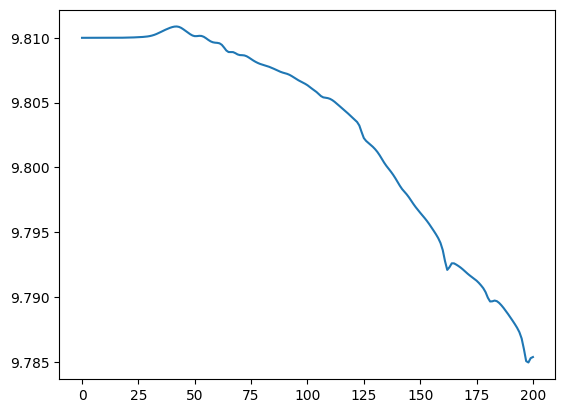

In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m  = np.array([1.0, 1.0])
h = 0.02
N = 200
t, u = rk4pend(u0,ks,L0,m,h,N) # or lfpend or ab2pend

def pendulumEnergy(u,ks,L0,m):
  E = np.zeros(len(u[0]))
  for i in range(len(E)):
    x1, y1, x2, y2, v1x, v1y, v2x, v2y = u[:,i]
    k1, k2 = ks
    L01, L02 = L0
    m1, m2 = m
    v1 = np.array([v1x, v1y])
    v2 = np.array([v2x,v2y])
    E[i] = (.5 * m1 * (np.linalg.norm(v1)**2)) + (.5*m2*(np.linalg.norm(v2)**2))  + (.5*k1*((np.sqrt((x1)**2 + (y1)**2) - L01)**2)) + (.5*k2*(np.sqrt((x2 - x1)**2 + (y2 - y1)**2) - L02)**2) + m1*9.81*y1 + m2*9.81*y2
  return E

plt.plot(t, pendulumEnergy(u,ks,L0, m))


In [ ]:
#Leapfrog
def lfpend(u0,ks,L0,m,h,N):


      ylf = np.zeros((8, N+1))
      ylf[:,0] = u0
      t = np.linspace(0, N, N+1)
      for n in range(N):
        k1 = fpend(ylf[:,n], ks, L0, m)
        k2 = fpend(ylf[:,n] + 0.5*h*k1, ks, L0, m)
        if (n == 0):
            ylf[:,n+1] = ylf[:,n] + h*k2
        else:
            ylf[:,n+1] = ylf[:,n-1] + 2*h*fpend(ylf[:,n], ks, L0, m)

      return t, ylf

#RK-4
def rk4pend(u0,ks,L0,m,h,N):


      t = np.linspace(0, N, N+1)
      yrk4 = np.zeros((8, N+1))
      yrk4[:,0] = u0
      for n in range(N):
        k1 = fpend(yrk4[:,n], ks, L0, m)
        k2 = fpend(yrk4[:,n] + 0.5*h*k1, ks, L0, m)
        k3 = fpend(yrk4[:,n] + 0.5*h*k2, ks, L0, m)
        k4 = fpend(yrk4[:,n] + h*k3, ks, L0, m)
        yrk4[:,n+1] = yrk4[:,n] + h*(k1/6 + k2/3 + k3/3 + k4/6)
      return t,yrk4



def ab2pend(u0,ks,L0,m,h,N):
    yab2 = np.zeros((8, N+1))
    yab2[:,0] = u0
    for n in range(N):
        k_1 = fpend(yab2[:,n], ks, L0, m)
        k_2 = fpend(yab2[:,n] + 0.5*h*k_1, ks, L0, m)
        if (n == 0):
            yab2[:,n+1] = yab2[:,n] + h*k_2
        else:
            yab2[:,n+1] = yab2[:,n] + 1.5*h*fpend(yab2[:,n], ks, L0, m) - 0.5*h*fpend(yab2[:,n-1], ks, L0, m)

    t = np.linspace(0, N, N+1)

    return t,yab2

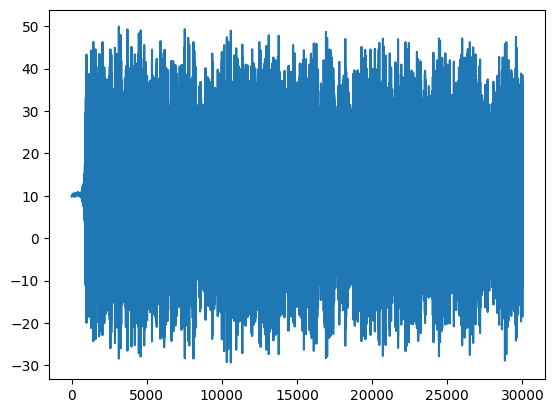

In [ ]:
u0 = np.array([1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m  = np.array([1.0, 1.0])
h = 0.02
N = 30000
t, u = lfpend(u0,ks,L0,m,h,N) # or lfpend or ab2pend

def pendulumEnergy(u,ks,L0,m):
  E = np.zeros(len(u[0]))
  for i in range(len(E)):
    x1, y1, x2, y2, v1x, v1y, v2x, v2y = u[:,i]
    k1, k2 = ks
    L01, L02 = L0
    m1, m2 = m
    v1 = np.array([v1x, v1y])
    v2 = np.array([v2x,v2y])
    E[i] = (.5 * m1 * (np.linalg.norm(v1)**2)) + (.5*m2*(np.linalg.norm(v2)**2))  + (.5*k1*((np.sqrt((x1)**2 + (y1)**2) - L01)**2)) + (.5*k2*(np.sqrt((x2 - x1)**2 + (y2 - y1)**2) - L02)**2) + m1*9.81*y1 + m2*9.81*y2
  return E

plt.plot(t, pendulumEnergy(u,ks,L0, m))


In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m  = np.array([1.0, 1.0])
h = 0.02
N = 200
t, u = rk4pend(u0,ks,L0,m,h,N) # or lfpend or ab2pend
print(t)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.02
N = 30000

t1, u1 = rk4pend(u0,ks,L0,m,h,N)
t2, u2 = lfpend(u0,ks,L0,m,h,N)
t3, u3 = ab2pend(u0,ks,L0,m,h,N)

In [ ]:
E1 = pendulumEnergy(u1,ks,L0, m)
E2 = pendulumEnergy(u2,ks,L0, m)
E3 = pendulumEnergy(u3,ks,L0, m)

In [ ]:
#RK4
plt.plot(t1, E1)
plt.xlabel('t')
plt.ylabel('E')
plt.title('Total Energy with RK4 Method')
plt.grid()

In [ ]:
plt.plot(t2, E2)
plt.xlabel('t')
plt.ylabel('E')
plt.title('Total Energy with Leapfrog Method')
plt.grid()

In [ ]:
plt.plot(t3, E3)
plt.xlabel('t')
plt.ylabel('E')
plt.title('Total Energy with AB2 Method')
plt.grid()
#plt.ylim(0,500)

In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.05
N = 12000

t1, u1 = rk4pend(u0,ks,L0,m,h,N)
t2, u2 = lfpend(u0,ks,L0,m,h,N)
t3, u3 = ab2pend(u0,ks,L0,m,h,N)

In [ ]:
E1 = pendulumEnergy(u1,ks,L0, m)
E2 = pendulumEnergy(u2,ks,L0, m)
E3 = pendulumEnergy(u3,ks,L0, m)

In [ ]:
plt.plot(t1, E1);
plt.xlabel('t (h = 0.05)')
plt.ylabel('E')
plt.title('Total Energy with RK4 Method')
plt.grid()

In [ ]:
plt.plot(t2, E2)
plt.xlabel('t (h = 0.05)')
plt.ylabel('E')
plt.title('Total Energy with Leapfrog Method')
plt.grid()

In [ ]:
plt.plot(t3, E3)
plt.xlabel('t (h = 0.05)')
plt.ylabel('E')
plt.title('Total Energy with AB2 Method')
plt.grid()

In [ ]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.1
N = 6000

t1, u1 = rk4pend(u0,ks,L0,m,h,N)
t2, u2 = lfpend(u0,ks,L0,m,h,N)
t3, u3 = ab2pend(u0,ks,L0,m,h,N)

In [ ]:
E1 = pendulumEnergy(u1,ks,L0, m)
E2 = pendulumEnergy(u2,ks,L0, m)
E3 = pendulumEnergy(u3,ks,L0, m)

In [ ]:
plt.plot(t1, E1);
plt.xlabel('t (h = 0.1)')
plt.ylabel('E')
plt.title('Total Energy with RK4 Method')
plt.grid()

In [ ]:
plt.plot(t2, E2)
plt.xlabel('t (h = 0.1)')
plt.ylabel('E')
plt.title('Total Energy with Leapfrog Method')
plt.grid()

In [ ]:
plt.plot(t3[0:400], E3[0:400])
plt.xlabel('t (h = 0.1)')
plt.ylabel('E')
plt.title('Total Energy with AB2 Method')
plt.grid()